In [104]:
# %run ./footprint_v_biocapacity.ipynb
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filepath = "Resources/countries.csv"
eco_csv = pd.read_csv(filepath, header=0)
eco_csv.head()
# eco_csv.set_index("Region")

my_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17]])
# my_df.head()

# Countries with Highest Biocapacity Deficit

In [105]:
my_df['Bio Deficit or Reserve %'] = my_df['Biocapacity Deficit or Reserve']/my_df['Total Biocapacity'] * 100
my_df['Bio Deficit or Reserve %'] = my_df['Bio Deficit or Reserve %'].map('{:.1f}%'.format)
# my_df['Footprint per Million Persons'] = my_df['Total Ecological Footprint'] / my_df['Population (millions)']
# my_df['Footprint per Million Persons'] = my_df['Footprint per Million Persons'].map('{:.2f}'.format)

eco_sort = my_df.sort_values('Biocapacity Deficit or Reserve')
eco_sort.reset_index(inplace=True, drop=True)
eco_sort.head()


,Country,Region,Population (millions),Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Bio Deficit or Reserve %
0,Luxembourg,European Union,0.52,1.10,0.76,1.03,12.65,0.13,15.82,0.57,0.08,0.89,0.00,0.14,1.68,-14.14,-841.7%
1,Aruba,Latin America,0.10,NaN,NaN,NaN,NaN,NaN,11.88,NaN,NaN,NaN,NaN,NaN,0.57,-11.31,-1984.2%
2,Qatar,Middle East/Central Asia,2.05,0.57,0.27,0.15,9.57,0.19,10.80,0.01,0.00,0.00,1.17,0.06,1.24,-9.56,-771.0%
3,Singapore,Asia-Pacific,5.30,0.67,0.24,0.91,5.91,0.22,7.97,0.00,0.00,0.00,0.01,0.03,0.05,-7.92,-15840.0%
4,Kuwait,Middle East/Central Asia,3.25,0.55,0.24,0.21,6.89,0.09,8.13,0.02,0.01,0.00,0.37,0.15,0.55,-7.58,-1378.2%


# Countries with Highest Biocapacity Reserve

In [106]:
eco_sort.tail()

,Country,Region,Population (millions),Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Bio Deficit or Reserve %
183,Bolivia,Latin America,10.50,0.37,1.69,0.17,0.67,0.01,2.96,0.59,2.18,13.86,0.05,0.06,16.73,13.77,82.3%
184,Gabon,Africa,1.63,0.53,0.13,0.79,0.43,0.11,2.02,0.25,3.60,19.50,2.93,0.03,26.31,24.29,92.3%
185,Guyana,Latin America,0.80,0.70,0.22,0.77,1.25,0.06,3.07,0.69,1.51,59.19,5.12,0.06,66.58,63.51,95.4%
186,Suriname,Latin America,0.54,0.43,0.06,0.52,3.01,0.14,4.25,0.30,0.03,81.52,7.39,0.09,89.33,85.08,95.2%
187,French Guiana,Latin America,0.24,0.07,0.06,0.46,1.58,0.17,2.34,0.07,0.06,95.16,16.07,0.00,111.35,109.01,97.9%


# How U.S. ranks

In [107]:
index_us = eco_sort.loc[eco_sort["Country"] == "United States of America",:]
index_us


,Country,Region,Population (millions),Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Bio Deficit or Reserve %
17,United States of America,North America,317.5,1.13,0.3,0.67,5.9,0.12,8.22,1.49,0.28,1.57,0.33,0.09,3.76,-4.46,-118.6%


# Regional Totals

In [108]:
region = eco_sort.groupby('Region').sum()

# Create row with Global Totals for later use
region_cols = region.keys().tolist()
region_sum = []

for col in range(len(region_cols)):
    region_sum.append(region.iloc[:,col].sum())

# Recalculate last columns based on new data
region['Bio Deficit or Reserve %'] = region['Biocapacity Deficit or Reserve']/region['Total Biocapacity'] * 100
region['Bio Deficit or Reserve %'] = region['Bio Deficit or Reserve %'].map('{:.1f}%'.format)
# region['Footprint per Million Persons'] = region['Total Ecological Footprint'] / region['Population (millions)']
# region['Footprint per Million Persons'] = region['Footprint per Million Persons'].map('{:.2f}'.format)
# region.sort_values('Bio Deficit or Reserve %')
region

,Population (millions),Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Bio Deficit or Reserve %
Region,,,,,,,,,,,,,,,
Africa,1034.640,19.48,11.48,15.50,29.04,4.69,86.89,15.20,29.78,51.11,18.19,1.98,117.66,30.78,26.2%
Asia-Pacific,3880.170,17.96,7.97,11.22,45.42,6.97,98.02,16.51,18.07,35.48,18.09,2.29,93.29,-4.72,-5.1%
European Union,503.980,23.59,6.25,15.40,78.34,2.78,142.36,25.96,2.92,29.36,9.39,3.25,94.87,-47.50,-50.1%
Latin America,605.410,14.85,12.57,11.91,56.41,4.37,135.87,15.26,19.18,282.18,46.42,1.80,372.98,237.14,63.6%
Middle East/Central Asia,405.586,13.77,4.87,3.70,67.82,1.48,93.25,6.92,6.52,2.28,5.09,1.58,22.41,-70.87,-316.2%
North America,352.400,2.59,0.63,1.87,10.90,0.24,22.16,4.60,0.57,10.69,3.74,0.16,19.90,-2.27,-11.4%
Northern/Eastern Europe,238.180,7.79,1.76,5.07,24.32,0.66,45.16,7.56,1.95,14.34,2.04,0.55,34.59,-10.57,-30.6%


In [109]:
# Global Totals dataframe
region_totals = pd.DataFrame([region_sum], columns=region_cols)
region_totals.rename(index = {0: "Global Totals"}, inplace=True)

# Recalculate last columns based on new data
region_totals['Bio Deficit or Reserve %'] = region_totals['Biocapacity Deficit or Reserve']/region_totals['Total Biocapacity'] * 100
region_totals['Bio Deficit or Reserve %'] = region_totals['Bio Deficit or Reserve %'].map('{:.1f}%'.format)
# region_totals['Footprint per Million Persons'] = region_totals['Total Ecological Footprint'] / region_totals['Population (millions)']
# region_totals['Footprint per Million Persons'] = region_totals['Footprint per Million Persons'].map('{:.2f}'.format)
region_totals

,Population (millions),Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Bio Deficit or Reserve %
Global Totals,7020.366,100.03,45.53,64.67,312.25,21.19,623.71,92.01,78.99,425.44,102.96,11.61,755.7,131.99,17.5%


# Regional Land Type Usage

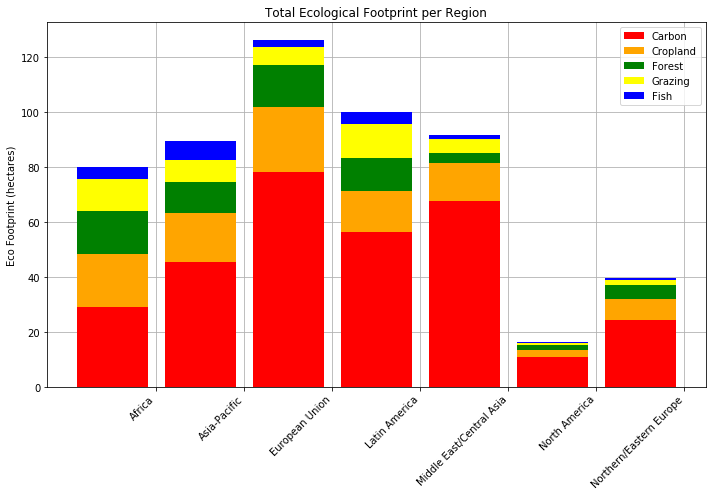

In [119]:
# Data lists
region_list = region.index.tolist()

carbon_foot = region['Carbon Footprint']
crop_foot = region['Cropland Footprint']
forest_foot = region['Forest Footprint']
grazing_foot = region['Grazing Footprint']
fish_foot = region['Fish Footprint']

# Set up axes and labels
fig, ax = plt.subplots(figsize=(10,7))

x_ticks = np.arange(len(region_list))
ax.set_xticks(x_ticks)
ax.set_xticklabels(region_list, rotation=45, horizontalalignment='right')

plt.grid(zorder=0)
plt.title('Total Ecological Footprint per Region')
plt.ylabel('Eco Footprint (hectares)')

# Calculate the bottoms of each stacked bar
crop_bottom = carbon_foot
forest_bottom = np.add(carbon_foot, crop_foot)
grazing_bottom = np.add(forest_bottom, forest_foot)
fish_bottom = np.add(grazing_bottom, grazing_foot)

# Plot the stacked bar chart
carbon_bar = plt.bar(x_ticks-0.5, carbon_foot, width=0.8, color='red', zorder=2)
crop_bar = plt.bar(x_ticks-0.5, crop_foot, width=0.8, bottom=crop_bottom, color='orange', zorder=2)
forest_bar = plt.bar(x_ticks-0.5, forest_foot, width=0.8, bottom=forest_bottom, color='green', zorder=2)
grazing_bar = plt.bar(x_ticks-0.5, grazing_foot, width=0.8, bottom=grazing_bottom, color='yellow', zorder=2)
fish_bar = plt.bar(x_ticks-0.5, fish_foot, width=0.8, bottom=fish_bottom, color='blue', zorder=2)

plt.legend((carbon_bar, crop_bar, forest_bar, grazing_bar, fish_bar), ('Carbon', 'Cropland', 'Forest', 'Grazing', 'Fish'))

# Save the Figure
plt.tight_layout()
plt.savefig('Images/total_footprint.png')

# Show the Figure
plt.show()


In [117]:
print("North America has an overall low footprint but that's because Canada's Reserve compensates for the U.S.'s Deficit.")
na_countries = eco_sort.loc[eco_sort["Region"] == "North America",:]
na_countries

North America has an overall low footprint but that's because Canada's Reserve compensates for the U.S.'s Deficit.


,Country,Region,Population (millions),Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Bio Deficit or Reserve %
11,Bermuda,North America,0.06,NaN,NaN,NaN,NaN,NaN,5.77,NaN,NaN,NaN,NaN,NaN,0.13,-5.64,-4338.5%
17,United States of America,North America,317.50,1.13,0.30,0.67,5.9,0.12,8.22,1.49,0.28,1.57,0.33,0.09,3.76,-4.46,-118.6%
180,Canada,North America,34.84,1.46,0.33,1.20,5.0,0.12,8.17,3.11,0.29,9.12,3.41,0.07,16.01,7.83,48.9%


In [112]:
region_landuse = pd.DataFrame({
    'Population (millions)' : region['Population (millions)'],
    'Total Biocapacity' : region['Total Biocapacity'],
    'Cropland Deficit or Reserve' : region['Cropland'] - region['Cropland Footprint'],
    'Grazing Deficit or Reserve' : region['Grazing Land'] - region['Grazing Footprint'],
    'Forest Deficit or Reserve' : region['Forest Land'] - region['Forest Footprint'],
    'Fish Deficit or Reserve' : region['Fishing Water'] - region['Fish Footprint'],
    'Carbon Deficit or Reserve' : region['Urban Land'] - region['Carbon Footprint'],
    'Total Bio Deficit or Reserve' : region['Biocapacity Deficit or Reserve'],
    'Bio Deficit or Reserve %' : region['Bio Deficit or Reserve %'],
#     'Footprint per Million Persons' : region['Footprint per Million Persons'],
})

# region_landuse.sort_values(by=['Total Bio Deficit or Reserve'], inplace = True) 

# Conditional color formatting for the dataframe
def highlight_pos(value):
    is_pos = value >= 0
    return ['background-color: mediumseagreen' if v else 'background-color: lightcoral' for v in is_pos]

df_slice = pd.IndexSlice[:, 'Cropland Deficit or Reserve':'Total Bio Deficit or Reserve']
region_landuse.style.apply(highlight_pos, subset = df_slice)


,Population (millions),Total Biocapacity,Cropland Deficit or Reserve,Grazing Deficit or Reserve,Forest Deficit or Reserve,Fish Deficit or Reserve,Carbon Deficit or Reserve,Total Bio Deficit or Reserve,Bio Deficit or Reserve %
Region,,,,,,,,,
Africa,1034.64,117.66,-4.28,18.3,35.61,13.5,-27.06,30.78,26.2%
Asia-Pacific,3880.17,93.29,-1.45,10.1,24.26,11.12,-43.13,-4.72,-5.1%
European Union,503.98,94.87,2.37,-3.33,13.96,6.61,-75.09,-47.5,-50.1%
Latin America,605.41,372.98,0.41,6.61,270.27,42.05,-54.61,237.14,63.6%
Middle East/Central Asia,405.586,22.41,-6.85,1.65,-1.42,3.61,-66.24,-70.87,-316.2%
North America,352.4,19.9,2.01,-0.06,8.82,3.5,-10.74,-2.27,-11.4%
Northern/Eastern Europe,238.18,34.59,-0.23,0.19,9.27,1.38,-23.77,-10.57,-30.6%


In [113]:
global_reserve = round(region_landuse['Total Bio Deficit or Reserve'].sum(), 2)
print(f'The total Global Biocapacity Reserve is {global_reserve} hectares.')

The total Global Biocapacity Reserve is 131.99 hectares.


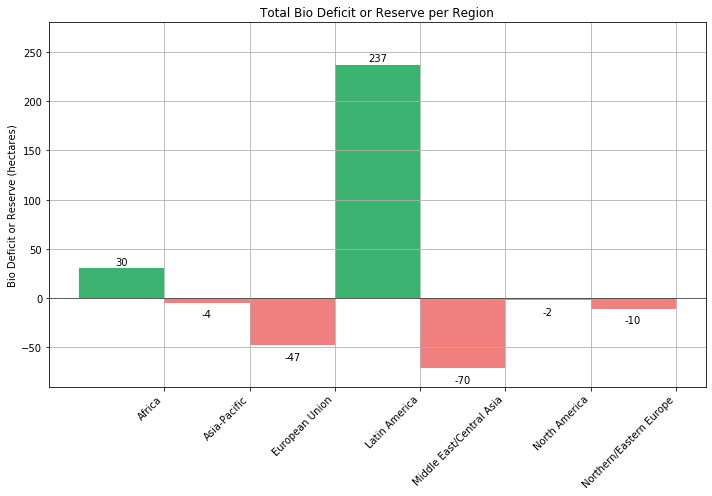

In [118]:
# Data lists
region_list = region_landuse.index.tolist()
total_deficit = region_landuse['Total Bio Deficit or Reserve'].tolist()

# Set up axes 
fig, ax = plt.subplots(figsize=(10,7))

x_ticks = np.arange(len(region_list))
ax.set_xticks(x_ticks)
ax.set_xticklabels(region_list, rotation=45, horizontalalignment='right')
plt.ylim(-90,280,50)

plt.grid()
plt.axhline(linewidth=0.5, color='black')

plt.title('Total Bio Deficit or Reserve per Region')
plt.ylabel('Bio Deficit or Reserve (hectares)')


# Function to label the bars
def autolabel(rects):
    for rect in rects:
        bar_height = rect.get_height()
        
        # Formatting if change is negative or positive
        if bar_height >= 0:
            label_va = bar_height + 3
        else:
            label_va = bar_height - 15

        ax.text(rect.get_x() + rect.get_width()/2, label_va,
            str(int(bar_height)), ha='center')

# Color the bars        
bar_color = []
for change in total_deficit:
    if change <= 0:
        bar_color.append('lightcoral')
    else:
        bar_color.append('mediumseagreen')
        
# Plot the chart
bar_format = ax.bar(x_ticks - 0.5, total_deficit, width=1.0, color=bar_color)

# Call function to label the bars
autolabel(bar_format)

# Save the Figure
plt.tight_layout()
plt.savefig('Images/bio-deficit-reserve.png')

# Show the Figure
plt.show()


In [115]:
# Scatter plot Populaton v Footprint or Bio Deficit?

## Data Source
https://www.kaggle.com/footprintnetwork/ecological-footprint/
<br>Data collected through 2016

## Definitions
hectare: a metric unit of square measure, equal to 100 ares (2.471 acres or 10,000 square meters).

# Initial Observations
1. Most countries actually have a Biocapacity Reserve from many of their land types but they have a Total Biocapacity Deficit because their Carbon Footprint and/or Carbon Deficit is high. Carbon Footprint primarily comes from Urban Land, which means Urban Land requires a lot of resources and produces a lot of waste. The other Natural Land Types mostly have a reserve because they produce a lot of resources while producing little waste.
<br>**Note:** These charts do not necessarily indicate the push and pull of resources between land types or countries. For example, Urban Land has a Biocapacity Deficit but it is able to maintain because it is likely pulling resources from a land type with a Biocapacity Reserve. The same concept goes for countries with a Biocapacity Deficit pulling resources from countries with a Biocapacity Reserve.<br><br>

2. Latin America and Africa have a Biocapacity Reserve meaning they are using their ecological resources under capacity. Meanwhile all other regions have a Biocapacity Deficit meaning they are overusing their ecological resources, especially Middle East/Central Asia. This may have to do with having relatively high or low Total Biocapacity to begin with, respectively. Latin America has a high footprint (from people, animals, and land) but has a high biocapacity to pull from.<br><br>

**Note:** Total Deficit or Reserve may include some Land Types in its calculation but are not included in the original CSV. Also, Ecological Footprint is not all necessarily from human activity. It could come from animal, water, weather, land or many other types of activity.


## Possible Data Needs or Studies
* Population Density per Country
* Earths Required > 1.0?, Countries Required > 1.0?